# Breakout Room Activity

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r"C:\Users\VIPIN\Downloads\E-commerce.xlsx")

In [3]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   server_time      2025 non-null   datetime64[ns]
 1   device_type      2025 non-null   object        
 2   user_id          2022 non-null   float64       
 3   session_id       2024 non-null   float64       
 4   item_id          2023 non-null   float64       
 5   item_price       2024 non-null   float64       
 6   category         2019 non-null   float64       
 7   product_type     2024 non-null   float64       
 8   impression_time  2025 non-null   datetime64[ns]
 9   app_code         2024 non-null   float64       
 10  os_version       2016 non-null   object        
 11  is_4G            2025 non-null   int64         
 12  is_click         2025 non-null   int64         
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 205.8+ KB


In [5]:
data.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click
count,2022.000000,2.024000e+03,2023.000000,2024.000000,2019.000000,2024.000000,2024.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63505.154721,6661.115119,10.290738,5359.607213,244.741107,0.342222,0.049877
std,26401.598808,3.108620e+05,36830.177344,17296.372880,4.961514,3076.114288,124.477650,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,16.000000,0.000000,6.000000,1.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33845.500000,1465.000000,7.000000,2758.750000,190.000000,0.000000,0.000000
50%,46248.000000,5.440370e+05,62896.000000,2425.000000,11.000000,5355.500000,207.000000,0.000000,0.000000
75%,69375.500000,7.996875e+05,91322.000000,4793.000000,14.000000,8121.000000,371.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,239360.000000,17.000000,10573.000000,508.000000,1.000000,1.000000


In [13]:
data.shape

(2025, 13)

In [6]:
data.isna().sum()

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

In [8]:
data.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'os_version', 'is_4G', 'is_click'],
      dtype='object')

In [9]:
list1 = ['user_id', 'session_id', 'item_id','item_price', 'category', 'product_type', 'app_code']
for i in list1:
    data[i] = data[i].fillna(data[i].median())
    

In [10]:
data['os_version'].fillna(data['os_version'].mode()[0], inplace=True)

In [11]:
data.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

# Handling the missing values

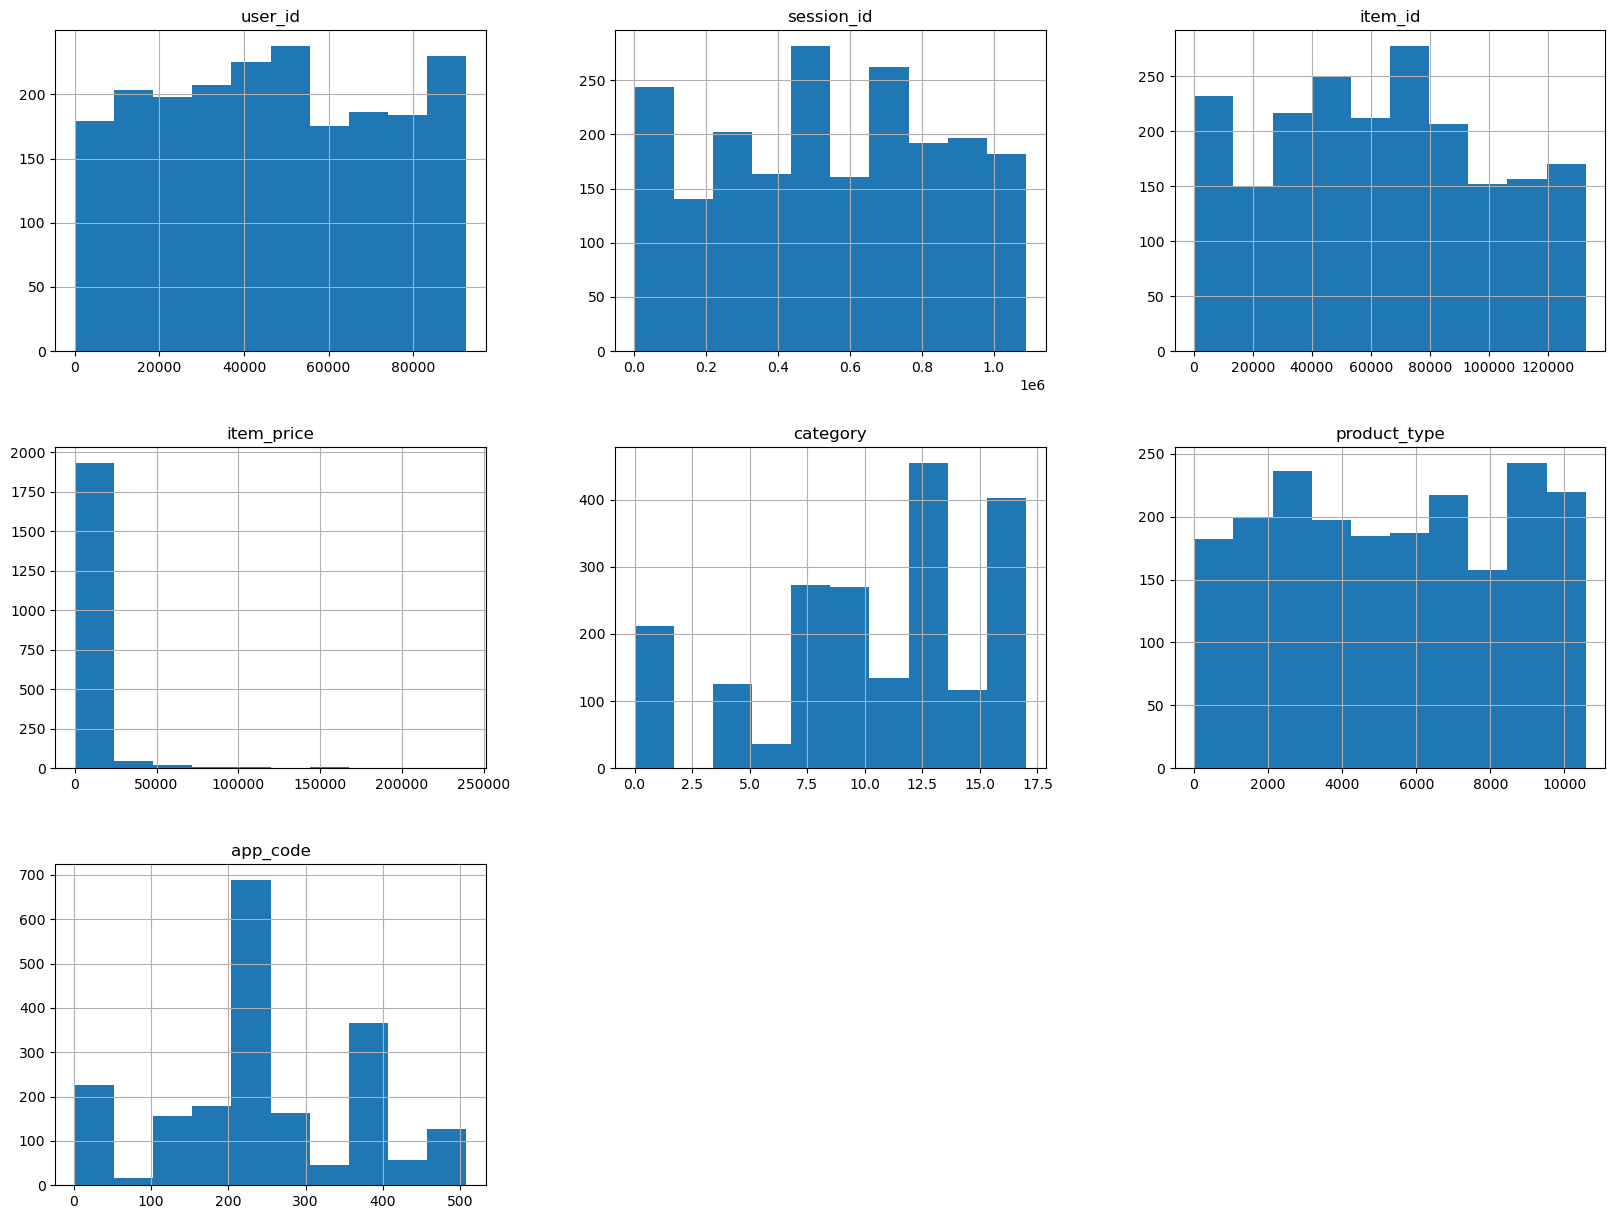

In [19]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

# Managing outliers

In [14]:
# outliers only have neumerical columns

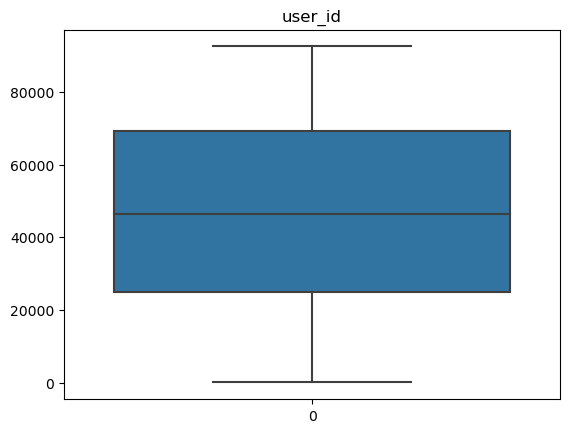

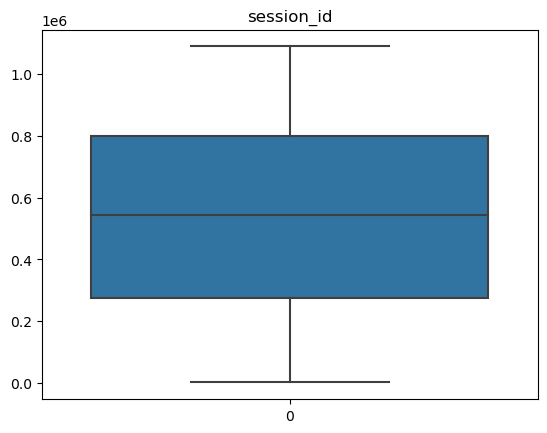

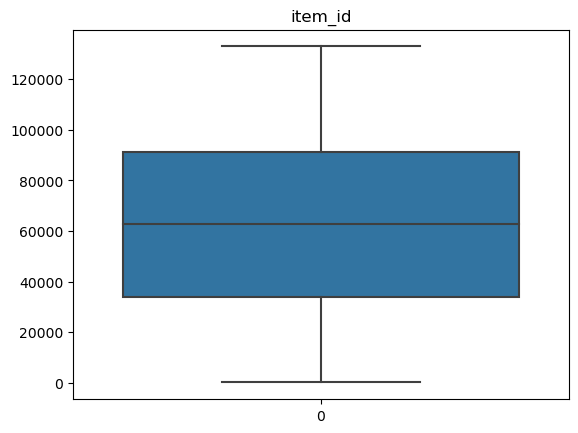

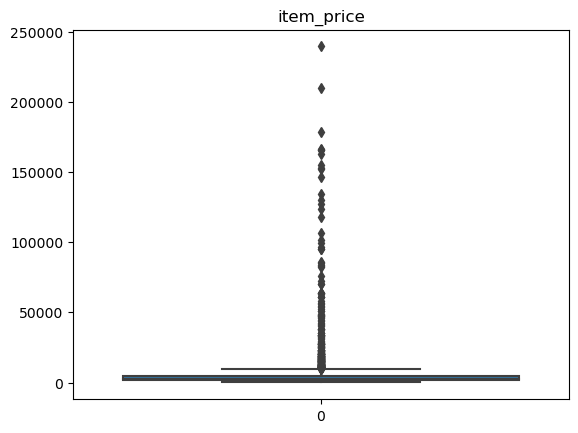

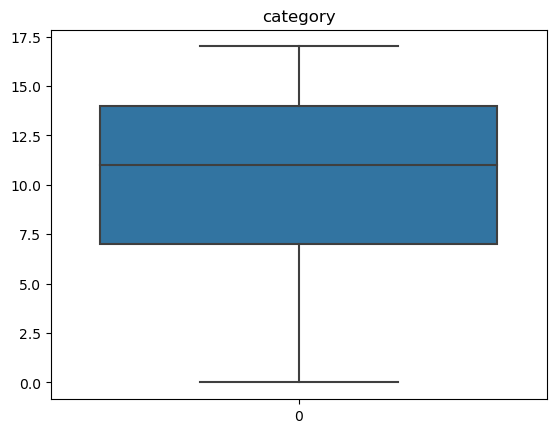

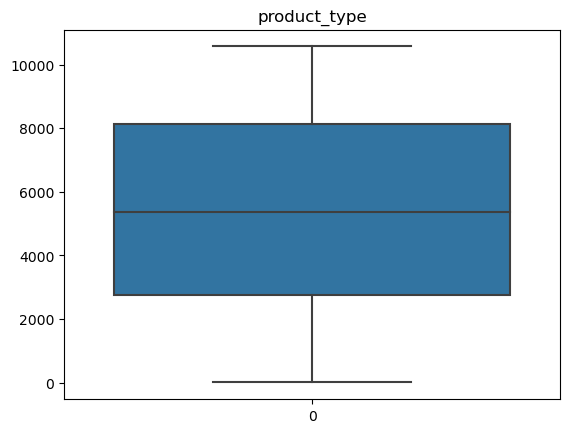

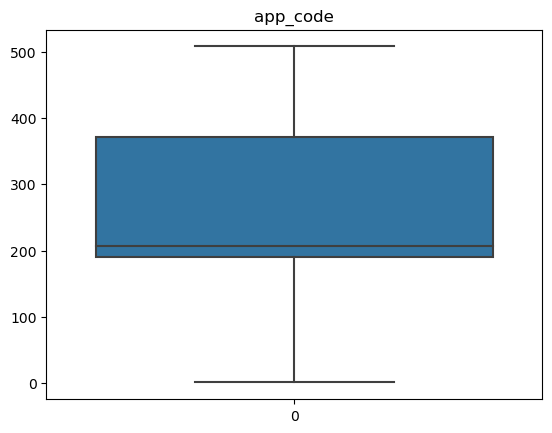

In [18]:
for i in list1:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [21]:
Q1 = data['item_price'].quantile(0.25)
Q2 = data['item_price'].quantile(0.50)
Q3 = data['item_price'].quantile(0.75)
print('Q1 :',Q1)
print('Q2 :',Q2) # q2 is median.
print('Q3: ',Q3)

IQR = Q3 - Q1
UL = Q4 = Q3 + (1.5 * IQR)
LL = Q0 = Q1 - (1.5 * IQR)
print("Upper Limit", UL)
print("Lower Limit", LL)

outliers = []
for value in data['item_price']:
    if (value>UL) or (value<LL):
        outliers.append(value)
print(outliers)

Q1 : 1465.0
Q2 : 2425.0
Q3:  4793.0
Upper Limit 9785.0
Lower Limit -3527.0
[18118.0, 17856.0, 17222.0, 11462.0, 10246.0, 23040.0, 10822.0, 10816.0, 11712.0, 12221.0, 46656.0, 20492.0, 85760.0, 9990.0, 54336.0, 15296.0, 13984.0, 33984.0, 13420.0, 19526.0, 51136.0, 9959.0, 10758.0, 10886.0, 25472.0, 35136.0, 11404.0, 11456.0, 99507.0, 12280.0, 53625.0, 18668.0, 22208.0, 21409.0, 83776.0, 14906.0, 18557.0, 130154.0, 20416.0, 14080.0, 117849.0, 17222.0, 178099.0, 165665.0, 11369.0, 32576.0, 10240.0, 14016.0, 41369.0, 16416.0, 63936.0, 10087.0, 10310.0, 12096.0, 10298.0, 21120.0, 26956.0, 13000.0, 16960.0, 152652.0, 16128.0, 47936.0, 10039.0, 19008.0, 9792.0, 27545.0, 20160.0, 10310.0, 18278.0, 165665.0, 96768.0, 10816.0, 14656.0, 64000.0, 37916.0, 70336.0, 27400.0, 24969.0, 15808.0, 15296.0, 40256.0, 12672.0, 49016.0, 61056.0, 15968.0, 22348.0, 17665.0, 22912.0, 16265.0, 47360.0, 20428.0, 12736.0, 21248.0, 11392.0, 32808.0, 27443.0, 10771.0, 10944.0, 11008.0, 17664.0, 31040.0, 20416.0, 183

In [22]:
data1 = data[(data['item_price']>=LL) & (data['item_price'] <=UL)]
print("Initial rows and coulmns: ",data.shape)
print("After dropping, count of rows and coulmns: ", data1.shape)

Initial rows and coulmns:  (2025, 13)
After dropping, count of rows and coulmns:  (1780, 13)


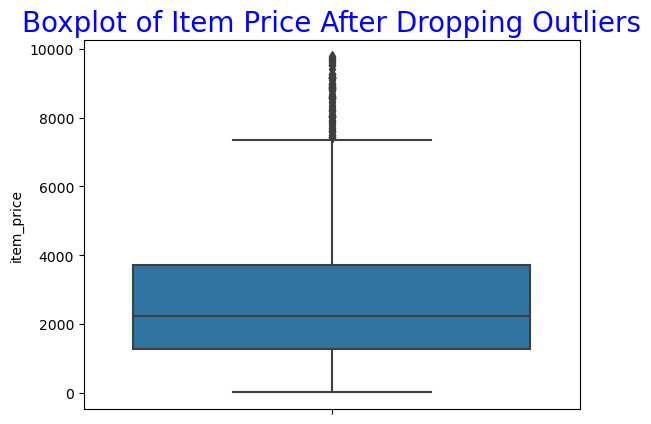

In [24]:
sns.boxplot(y = data1['item_price'])
plt.title("Boxplot of Item Price After Dropping Outliers", size = 20, color = 'blue')
plt.show()

# One hot Encoding

In [32]:
data.shape

(2025, 13)

In [33]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [26]:
data1 = pd.get_dummies(data)

In [27]:
data1.shape

(2025, 15)

In [34]:
data1.head()

,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click,device_type_android,os_version_intermediate,os_version_latest,os_version_old
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0,1,0,0,1
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1,0,1,0
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0,1,1,0,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0,1,0,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0,1,0,1,0


In [30]:
data['device_type'].nunique()

1

In [31]:
data['os_version'].nunique()

3

In [ ]:
# 11+1+3 = 15

# level encoding

In [35]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
data['os_version'] = le.fit_transform(data['os_version'])

In [39]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,2,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,0,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,1,0,0


# Min Max Scaling

In [60]:
data.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,os_version,is_4G,is_click
count,2025.000000,2.025000e+03,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63504.553086,6659.023210,10.298765,5359.605185,244.722469,0.982222,0.342222,0.049877
std,26382.025150,3.107852e+05,36811.981094,17292.355762,4.956343,3075.354286,124.449722,0.685594,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,16.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33864.000000,1465.000000,7.000000,2765.000000,190.000000,1.000000,0.000000,0.000000
50%,46285.000000,5.440370e+05,62896.000000,2425.000000,11.000000,5355.500000,207.000000,1.000000,0.000000,0.000000
75%,69266.000000,7.992640e+05,91322.000000,4793.000000,14.000000,8121.000000,371.000000,1.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,239360.000000,17.000000,10573.000000,508.000000,2.000000,1.000000,1.000000


In [61]:
x = data.drop('item_price',axis=1) # feature or indpendent var
y = data['item_price'] # target or response or dependent var

In [62]:
x.describe()

,user_id,session_id,item_id,category,product_type,app_code,os_version,is_4G,is_click
count,2025.000000,2.025000e+03,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63504.553086,10.298765,5359.605185,244.722469,0.982222,0.342222,0.049877
std,26382.025150,3.107852e+05,36811.981094,4.956343,3075.354286,124.449722,0.685594,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33864.000000,7.000000,2765.000000,190.000000,1.000000,0.000000,0.000000
50%,46285.000000,5.440370e+05,62896.000000,11.000000,5355.500000,207.000000,1.000000,0.000000,0.000000
75%,69266.000000,7.992640e+05,91322.000000,14.000000,8121.000000,371.000000,1.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,17.000000,10573.000000,508.000000,2.000000,1.000000,1.000000


In [63]:
x1 = x.drop(['server_time','device_type','impression_time', 'os_version'],axis=1)

In [64]:
x1.head()

,user_id,session_id,item_id,category,product_type,app_code,is_4G,is_click
0,87862.0,268465.0,44459.0,11.0,3040.0,422.0,0,0
1,63410.0,268465.0,44459.0,12.0,6822.0,467.0,1,1
2,71748.0,268465.0,44459.0,17.0,1619.0,259.0,1,0
3,69209.0,268465.0,44459.0,13.0,5264.0,244.0,1,0
4,62873.0,268465.0,44459.0,17.0,10239.0,473.0,0,0


In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
min_max = MinMaxScaler()

In [67]:
x1 = min_max.fit_transform(x1)

In [68]:
type(x1)

numpy.ndarray

In [69]:
x1 = pd.DataFrame(x1,columns = ['user_id','session_id','item_id','category','product_type','app_code','is_4G','is_click'])

In [70]:
type(x1)

pandas.core.frame.DataFrame

In [71]:
x1.describe()

,user_id,session_id,item_id,category,product_type,app_code,is_4G,is_click
count,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,0.504924,0.501762,0.477271,0.605810,0.506634,0.480715,0.342222,0.049877
std,0.285217,0.285773,0.277431,0.291550,0.291034,0.245463,0.474571,0.217744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.268579,0.250213,0.253887,0.411765,0.261096,0.372781,0.000000,0.000000
50%,0.500281,0.498695,0.472684,0.647059,0.506246,0.406312,0.000000,0.000000
75%,0.748730,0.733381,0.686915,0.823529,0.767957,0.729783,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Standard Scaling

In [72]:
x.describe()

,user_id,session_id,item_id,category,product_type,app_code,os_version,is_4G,is_click
count,2025.000000,2.025000e+03,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63504.553086,10.298765,5359.605185,244.722469,0.982222,0.342222,0.049877
std,26382.025150,3.107852e+05,36811.981094,4.956343,3075.354286,124.449722,0.685594,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33864.000000,7.000000,2765.000000,190.000000,1.000000,0.000000,0.000000
50%,46285.000000,5.440370e+05,62896.000000,11.000000,5355.500000,207.000000,1.000000,0.000000,0.000000
75%,69266.000000,7.992640e+05,91322.000000,14.000000,8121.000000,371.000000,1.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,17.000000,10573.000000,508.000000,2.000000,1.000000,1.000000


In [73]:
x2 = x.drop(['server_time','device_type','impression_time', 'os_version'],axis=1)

In [74]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
x2 = std_scl.fit_transform(x2)
type(x2)

numpy.ndarray

In [75]:
x2 = pd.DataFrame(x2,columns = ['user_id','session_id','item_id','category','product_type','app_code','is_4G','is_click'])

In [76]:
x2.describe()

,user_id,session_id,item_id,category,product_type,app_code,is_4G,is_click
count,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03
mean,-1.754427e-18,1.631617e-16,9.561624e-17,9.298460e-17,-3.245689e-17,8.772133e-19,2.807082e-17,9.298460e-17
std,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00
min,-1.770751e+00,-1.756240e+00,-1.720749e+00,-2.078409e+00,-1.741239e+00,-1.958885e+00,-7.212976e-01,-2.291174e-01
25%,-8.288546e-01,-8.804571e-01,-8.053866e-01,-6.657287e-01,-8.438852e-01,-4.398241e-01,-7.212976e-01,-2.291174e-01
50%,-1.628260e-02,-1.073493e-02,-1.653547e-02,1.415172e-01,-1.335195e-03,-3.031890e-01,-7.212976e-01,-2.291174e-01
75%,8.550181e-01,8.107008e-01,7.558495e-01,7.469516e-01,8.981329e-01,1.014938e+00,1.386390e+00,-2.291174e-01
max,1.736214e+00,1.743907e+00,1.884647e+00,1.352386e+00,1.695636e+00,2.116056e+00,1.386390e+00,4.364574e+00
